# Using AHPTree from `pyanp`

## First we import

In [1]:
import pandas as pd
import re
import sys 
import os
sys.path.insert(0, os.path.abspath("../"))
from pyanp.ahptree import AHPTree, ahptree_fromdf

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
pylab.rcParams['figure.figsize'] = (12, 7.5)

# Example model 

## Read in the data and verify it looks right

In [5]:
excel_file = '../tests/data/CleanedNish.xlsx'
ahp = ahptree_fromdf(excel_file)

In [6]:
ahp

## Look at global priorities

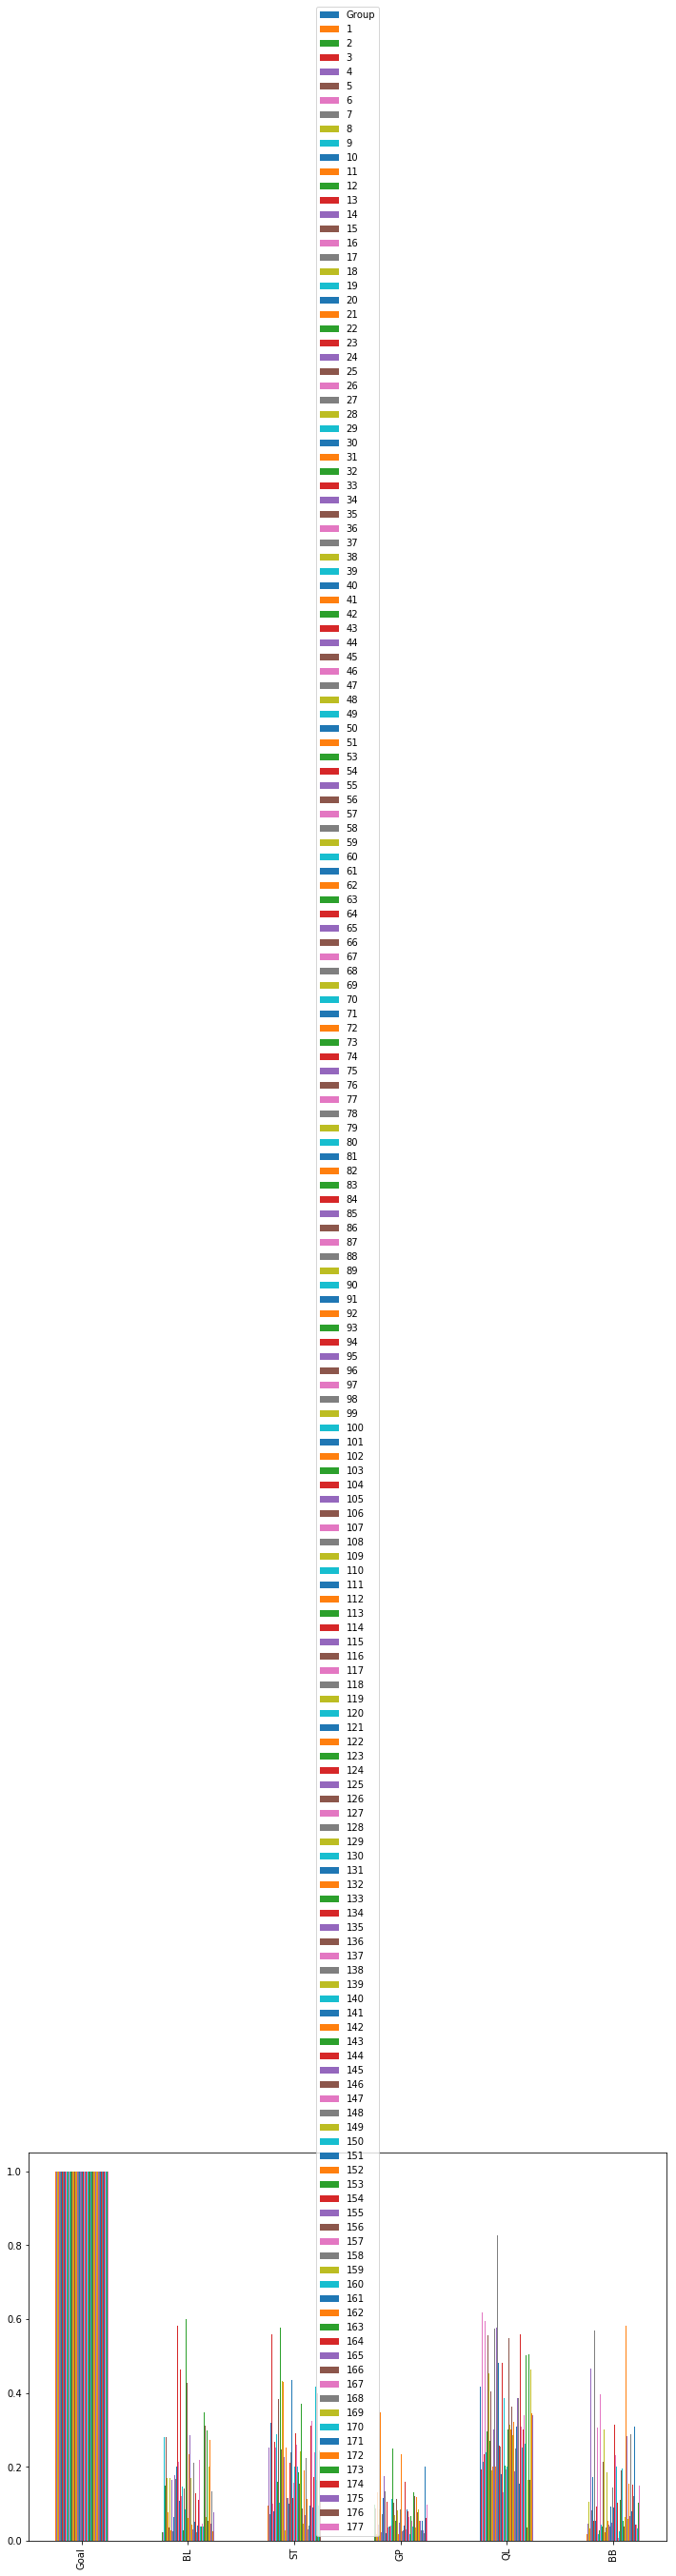

In [7]:
gs = ahp.global_priority_table()
gs.plot(kind="bar")

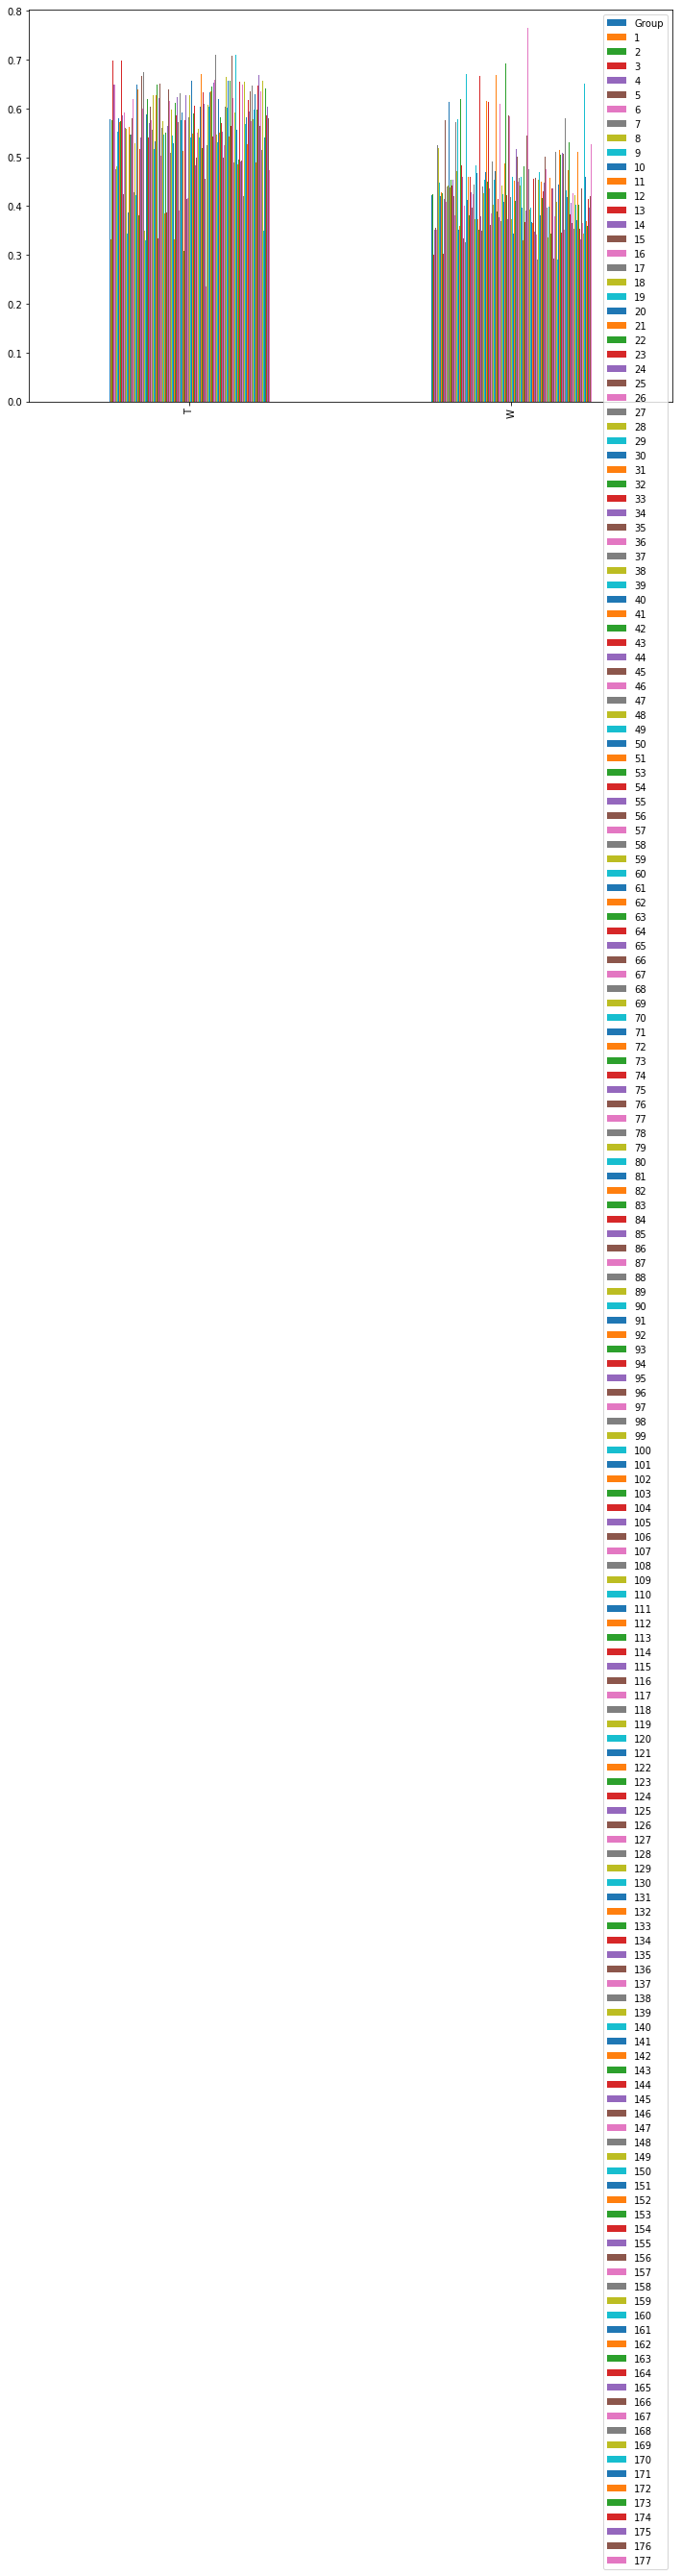

In [9]:
altscores = ahp.priority_table()
altscores.plot(kind="bar")

,Group,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
Goal,0.010285,0.404945,0.336328,0.603861,0.336029,0.104643,0.341604,0.201473,0.483421,0.420089,...,0.324753,0.149179,0.143643,0.0,0.249807,0.491298,0.261297,0.259113,0.170742,0.180931


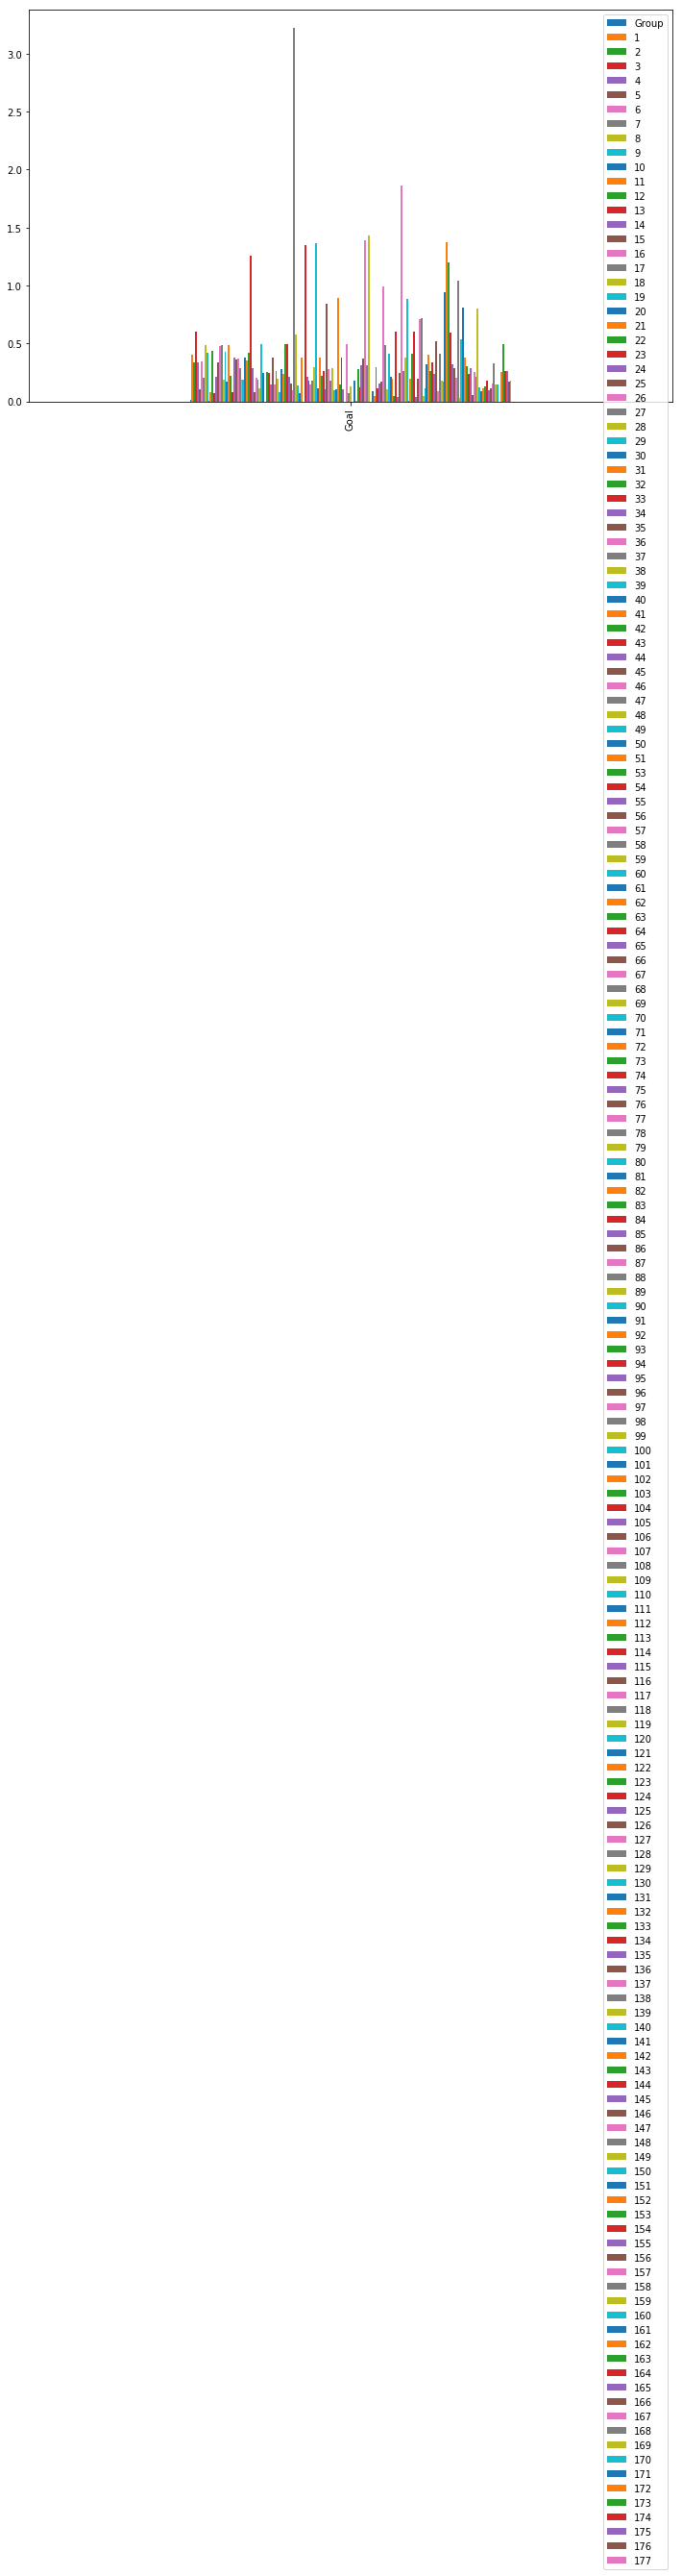

In [10]:
allincons = ahp.incond_std_table()
display(allincons)
allincons.plot(kind="bar")